# COVID-19 Exploratory Data Analysis Dataset John Hopkins University

### I have used datasets from offcial John Hopkins Github repository for exploratory data analysis of COVID-19

Link : https://github.com/CSSEGISandData/COVID-19

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,183,186,189,197,212,212,259,267,276,284


In [4]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [5]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,581,598,618,639,675,683,703,721,733,746
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,44,44,45,47,49,51,53,55,58,62
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,845,852,861,869,878,885,892,897,905,912
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,9,10,10,10,10,10,10,11,11,13


In [6]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [7]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,8422,8559,8674,8792,8920,9066,9202,9371,9674,9897
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,792,796,797,797,797,799,799,799,799,799
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,77,77,77,77,81,81,81,81,93,93


In [8]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-30-2020.csv')

In [9]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-01 04:33:52,34.223334,-82.461707,113,0,0,113,"Abbeville, South Carolina, US",460.716761,0.000000
1,22001.0,Acadia,Louisiana,US,2020-07-01 04:33:52,30.295065,-92.414197,878,36,0,842,"Acadia, Louisiana, US",1415.101942,4.100228
2,51001.0,Accomack,Virginia,US,2020-07-01 04:33:52,37.767072,-75.632346,1042,14,0,1028,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-01 04:33:52,43.452658,-116.241552,2169,23,0,2146,"Ada, Idaho, US",450.385912,1.060396
4,19001.0,Adair,Iowa,US,2020-07-01 04:33:52,41.330756,-94.471059,15,0,0,15,"Adair, Iowa, US",209.731544,0.000000


In [10]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/21/20', '6/22/20', '6/23/20', '6/24/20', '6/25/20', '6/26/20',
       '6/27/20', '6/28/20', '6/29/20', '6/30/20'],
      dtype='object', length=165)

In [11]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [12]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
0,0,0,0,0,0,0,0,0,0,0,...,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517
1,0,0,0,0,0,0,0,0,0,0,...,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535
2,0,0,0,0,0,0,0,0,0,0,...,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907
3,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,0,0,0,0,0,0,0,0,0,0,...,183,186,189,197,212,212,259,267,276,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,698,702,707,710,711,712,713,713,713,714
262,0,0,0,0,0,0,0,0,0,0,...,941,967,992,1015,1076,1089,1103,1118,1128,1158
263,0,0,0,0,0,0,0,0,0,0,...,247,247,265,265,272,272,272,272,272,303
264,0,0,0,0,0,0,0,0,0,0,...,5457,5513,5567,5630,5691,5747,5799,5849,5900,5900


In [13]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []


china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []

In [14]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
    
    
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())


In [15]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79525,
 80372,
 81346,
 82704,
 84070,
 85967,
 88325,
 90262,
 92795,
 95075,
 97844,
 101761,
 105782,
 109754,
 113536,
 118375,
 125704,
 130909,
 145204,
 156283,
 167022,
 181452,
 196917,
 216161,
 243084,
 272698,
 304844,
 337597,
 378381,
 418569,
 468155,
 530138,
 594178,
 661544,
 720695,
 783580,
 858317,
 933905,
 1014713,
 1097193,
 1177447,
 1251123,
 1322598,
 1397537,
 1481490,
 1567423,
 1659674,
 1737813,
 1836615,
 1906692,
 1977287,
 2057584,
 2153578,
 2242537,
 2316591,
 2399451,
 2472264,
 2546905,
 2622750,
 2711635,
 2799064,
 2884420,
 2958352,
 3027215,
 3101078,
 3176596,
 3261450,
 3349915,
 3432050,
 3511157,
 3587874,
 3668635,
 3760836,
 3851895,
 3945002,
 4030363,
 4108270,
 4184838,
 4268247,
 4353211

In [16]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2007,
 2122,
 2247,
 2251,
 2458,
 2469,
 2629,
 2708,
 2770,
 2814,
 2872,
 2941,
 2996,
 3085,
 3160,
 3254,
 3347,
 3459,
 3558,
 3801,
 3987,
 4263,
 4610,
 4913,
 5411,
 5831,
 6471,
 7151,
 7957,
 8852,
 9958,
 11439,
 13141,
 14840,
 16758,
 19026,
 21799,
 24800,
 28308,
 31990,
 35456,
 39604,
 44440,
 49968,
 56251,
 62213,
 68044,
 73031,
 78862,
 86765,
 93457,
 101043,
 108286,
 114307,
 120007,
 125730,
 132621,
 140886,
 148157,
 157022,
 163452,
 167983,
 173381,
 180475,
 187174,
 193926,
 200266,
 206459,
 210192,
 214747,
 221109,
 227992,
 233687,
 238942,
 244129,
 247797,
 251890,
 257612,
 264196,
 269905,
 275250,
 279661,
 283086,
 286697,
 292319,
 297539,
 302813,
 307998,
 312150,
 315546,
 318853,
 323662,
 328483,
 333292,
 338585,
 342565,
 345412,
 346583,
 350807,
 355990,
 360686,
 365380,


In [17]:
confirmed_sum

10475826

In [18]:
death_sum

511253

In [19]:
recovered_sum

5353205

In [20]:
us_cases

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 7,
 8,
 8,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 24,
 30,
 53,
 73,
 104,
 174,
 222,
 337,
 451,
 519,
 711,
 1109,
 1561,
 2157,
 2870,
 2968,
 4360,
 6141,
 8914,
 14153,
 19479,
 25818,
 33756,
 43845,
 54108,
 66044,
 84080,
 102254,
 122054,
 141194,
 162690,
 188701,
 214194,
 244593,
 276535,
 309699,
 337573,
 367210,
 397992,
 429686,
 464442,
 497943,
 527958,
 556517,
 581810,
 608845,
 637974,
 669272,
 701996,
 730317,
 756375,
 783716,
 809213,
 837414,
 871617,
 907908,
 940829,
 968517,
 990993,
 1015518,
 1042926,
 1072667,
 1106829,
 1136024,
 1161611,
 1184086,
 1208271,
 1233527,
 1261409,
 1288566,
 1314306,
 1334084,
 1352962,
 1374914,
 1396109,
 1423726,
 1449026,
 1474127,
 1493131,
 1514839,
 1535337,
 1558949,
 1584486,
 1608623,
 1630450,
 1651239,
 1670209,
 1689057,
 1707423,
 1730259,
 1754747,
 1778993,
 1799122,
 1816476,
 1

In [21]:
india_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

In [22]:
italy_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 3,
 45,
 46,
 46,
 83,
 149,
 160,
 276,
 414,
 523,
 589,
 622,
 724,
 724,
 1045,
 1045,
 1439,
 1966,
 2335,
 2749,
 2941,
 4025,
 4440,
 4440,
 6072,
 7024,
 7024,
 8326,
 9362,
 10361,
 10950,
 12384,
 13030,
 14620,
 15729,
 16847,
 18278,
 19758,
 20996,
 21815,
 22837,
 24392,
 26491,
 28470,
 30455,
 32534,
 34211,
 35435,
 37130,
 38092,
 40164,
 42727,
 44927,
 47055,
 48877,
 51600,
 54543,
 57576,
 60498,
 63120,
 64928,
 66624,
 68941,
 71252,
 75945,
 78249,
 79914,
 81654,
 82879,
 85231,
 93245,
 96276,
 99023,
 103031,
 105186,
 106587,
 109039,
 112541,
 115288,
 120205,
 122810,
 125176,
 127326,
 129401,
 132282,
 134560,
 136720,
 138840,
 140479,
 141981,
 144658,
 147101,
 150604,
 152844,
 155633,
 157507,
 158355,
 160092,
 160938,
 161895,
 163781,
 165078,
 165837,
 166584,
 168646,
 169939,
 171338,
 173085,
 174865,
 

In [23]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [24]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)

In [25]:
spain_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 7,
 2,
 17,
 13,
 39,
 36,
 45,
 57,
 37,
 141,
 100,
 173,
 400,
 622,
 582,
 0,
 2955,
 1159,
 1407,
 2144,
 1806,
 2162,
 4053,
 2447,
 4964,
 3394,
 6368,
 4749,
 9630,
 8271,
 7933,
 7516,
 6875,
 7846,
 7967,
 8195,
 7947,
 7134,
 6969,
 5478,
 5029,
 5267,
 6278,
 5002,
 5051,
 4754,
 3804,
 3268,
 2442,
 5103,
 7304,
 5891,
 887,
 6948,
 1536,
 3968,
 4211,
 4635,
 -10034,
 2915,
 1729,
 1831,
 1308,
 2144,
 518,
 1781,
 1366,
 884,
 545,
 1318,
 996,
 1122,
 1410,
 721,
 772,
 3086,
 594,
 661,
 849,
 643,
 515,
 0,
 908,
 431,
 518,
 482,
 1787,
 466,
 482,
 -372,
 859,
 0,
 1647,
 658,
 664,
 251,
 159,
 294,
 394,
 334,
 318,
 332,
 240,
 167,
 249,
 314,
 427,
 502,
 396,
 323,
 181,
 219,
 355,
 585,
 307,
 363,
 334,
 232,
 248,
 334,
 400,
 419,
 564,
 301,
 200,
 301]

In [26]:
germany_daily_increase

[0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 1,
 3,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 10,
 19,
 2,
 31,
 51,
 29,
 37,
 66,
 220,
 188,
 129,
 241,
 136,
 281,
 451,
 170,
 1597,
 910,
 1210,
 1477,
 1985,
 3070,
 2993,
 4528,
 2365,
 2660,
 4183,
 3930,
 4337,
 6615,
 6933,
 6824,
 4400,
 4790,
 4923,
 6064,
 6922,
 6365,
 4933,
 4031,
 3251,
 4289,
 5633,
 4885,
 3990,
 2737,
 2946,
 2218,
 1287,
 3394,
 2945,
 3699,
 1945,
 1842,
 1881,
 1226,
 2357,
 2481,
 1870,
 1514,
 1257,
 988,
 1154,
 1627,
 1470,
 1068,
 890,
 697,
 488,
 855,
 1155,
 1268,
 1158,
 736,
 555,
 697,
 595,
 927,
 380,
 755,
 519,
 617,
 182,
 1227,
 695,
 548,
 689,
 276,
 342,
 272,
 600,
 324,
 672,
 726,
 267,
 221,
 184,
 285,
 242,
 351,
 452,
 526,
 300,
 359,
 397,
 16,
 169,
 535,
 41,
 251,
 164,
 570,
 352,
 1213,
 482,
 371,
 602,
 496,
 712,
 391,
 500,
 665,
 422,
 235,
 349,
 376]

In [27]:
# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)

In [28]:
china_daily_death

[17,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 102,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 252,
 152,
 142,
 103,
 98,
 139,
 113,
 122,
 0,
 205,
 2,
 150,
 70,
 52,
 29,
 44,
 47,
 35,
 42,
 33,
 36,
 32,
 29,
 28,
 28,
 23,
 16,
 22,
 11,
 8,
 13,
 10,
 14,
 13,
 11,
 8,
 4,
 6,
 15,
 0,
 7,
 4,
 6,
 5,
 3,
 5,
 4,
 1,
 7,
 6,
 4,
 4,
 3,
 2,
 0,
 2,
 2,
 1,
 3,
 0,
 2,
 0,
 1,
 0,
 1290,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

In [29]:
uk_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 4,
 0,
 2,
 1,
 18,
 15,
 23,
 16,
 34,
 43,
 36,
 56,
 35,
 74,
 149,
 186,
 184,
 284,
 294,
 215,
 374,
 383,
 671,
 652,
 715,
 761,
 646,
 571,
 1038,
 1036,
 1104,
 1153,
 840,
 686,
 745,
 1048,
 846,
 1033,
 936,
 1118,
 499,
 565,
 1172,
 847,
 729,
 1013,
 844,
 420,
 341,
 911,
 797,
 676,
 741,
 622,
 315,
 289,
 692,
 649,
 539,
 627,
 346,
 268,
 211,
 628,
 495,
 429,
 385,
 468,
 170,
 160,
 546,
 364,
 338,
 351,
 282,
 118,
 121,
 134,
 412,
 377,
 324,
 215,
 113,
 556,
 325,
 359,
 176,
 357,
 204,
 77,
 55,
 288,
 245,
 151,
 202,
 181,
 36,
 38,
 233,
 184,
 135,
 173,
 128,
 43,
 14,
 280,
 154,
 149,
 184,
 100,
 36,
 25,
 156]

In [30]:
# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [31]:
india_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014,
 3571,
 3472,
 3171,
 11707,
 4309,
 4916,
 3902,
 4531,
 3786,
 4379,
 4783,
 5462,
 5153,
 5247,
 5575,
 536,
 11989,
 7135,
 8049,
 7419,
 10215,
 6922,
 7390,
 10386,
 9120,
 13897,
 9468,
 10994,
 10495,
 13012,
 13940,
 10244,
 13832,
 12010,
 13099,
 13090]

In [32]:
world_daily_recovery

[28,
 2,
 6,
 3,
 13,
 9,
 46,
 19,
 17,
 79,
 62,
 188,
 151,
 229,
 272,
 363,
 524,
 605,
 628,
 702,
 737,
 467,
 1145,
 1763,
 1337,
 1470,
 1718,
 1769,
 1769,
 2056,
 713,
 3996,
 508,
 1833,
 2678,
 2479,
 2893,
 3434,
 3071,
 2934,
 2886,
 2626,
 2942,
 2626,
 2069,
 2494,
 2335,
 1799,
 1911,
 2598,
 1321,
 1927,
 2371,
 3410,
 2054,
 2752,
 2483,
 1637,
 2445,
 4264,
 6215,
 465,
 9639,
 5783,
 8365,
 8769,
 8494,
 9467,
 15437,
 13486,
 15090,
 17041,
 15447,
 20413,
 13839,
 16633,
 23388,
 28716,
 25336,
 21819,
 26247,
 19403,
 27166,
 25093,
 36667,
 30828,
 26120,
 23923,
 31654,
 22002,
 34827,
 30429,
 28791,
 50033,
 27779,
 28603,
 27803,
 33266,
 42168,
 64971,
 38231,
 40917,
 32323,
 34064,
 36605,
 45918,
 39497,
 36522,
 53549,
 33594,
 46994,
 37035,
 55842,
 39735,
 47989,
 56591,
 40886,
 52898,
 52165,
 58913,
 51265,
 108651,
 54971,
 55440,
 63723,
 55214,
 63393,
 66857,
 77327,
 70472,
 76308,
 54895,
 104123,
 79142,
 70029,
 69156,
 72202,
 55093,
 1

In [33]:
unique_countries =  list(latest_data['Country_Region'].unique())
unique_countries

['US',
 'Italy',
 'Brazil',
 'Russia',
 'Mexico',
 'Japan',
 'Canada',
 'Colombia',
 'Peru',
 'Spain',
 'India',
 'United Kingdom',
 'China',
 'Chile',
 'Netherlands',
 'Australia',
 'Pakistan',
 'Germany',
 'Sweden',
 'Ukraine',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Et

In [34]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [35]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,2635417,127417,720631,1787369,0.048348
1,Brazil,1402041,59594,788318,554129,0.042505
2,Russia,646929,9306,411973,225650,0.014385
3,India,585493,17400,347979,220114,0.029719
4,United Kingdom,314160,43815,1370,268975,0.139467
5,Peru,285213,9677,174535,101001,0.033929
6,Chile,279393,5688,241229,32476,0.020358
7,Spain,249271,28355,150376,70540,0.113752
8,Italy,240578,34767,190248,15563,0.144514
9,Iran,227662,10817,188758,28087,0.047513


In [36]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [37]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [38]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': province_country, 'Number of Confirmed Cases': province_confirmed_cases,
                          'Number of Deaths': province_death_cases, 'Number of Recoveries' : province_recovery_cases,
                          'Mortality Rate': province_mortality_rate})
# number of cases per country/region

province_df.style.background_gradient(cmap='Reds')

In [39]:
# Dealing with missing values
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

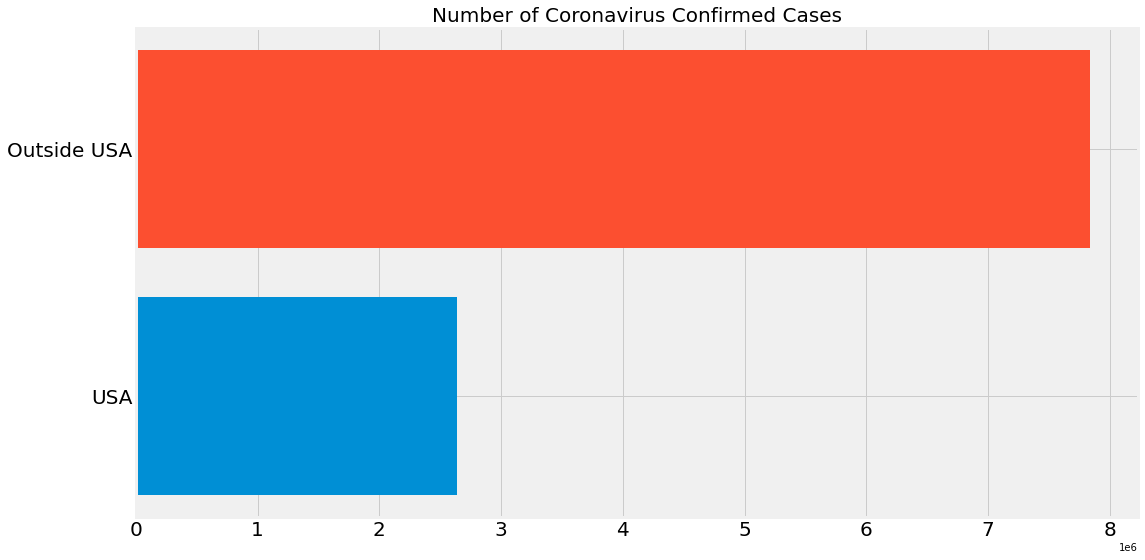

In [40]:
USA_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_USA_confirmed = np.sum(country_confirmed_cases) - USA_confirmed
plt.figure(figsize=(16, 9))
plt.barh('USA', USA_confirmed)
plt.barh('Outside USA', outside_USA_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

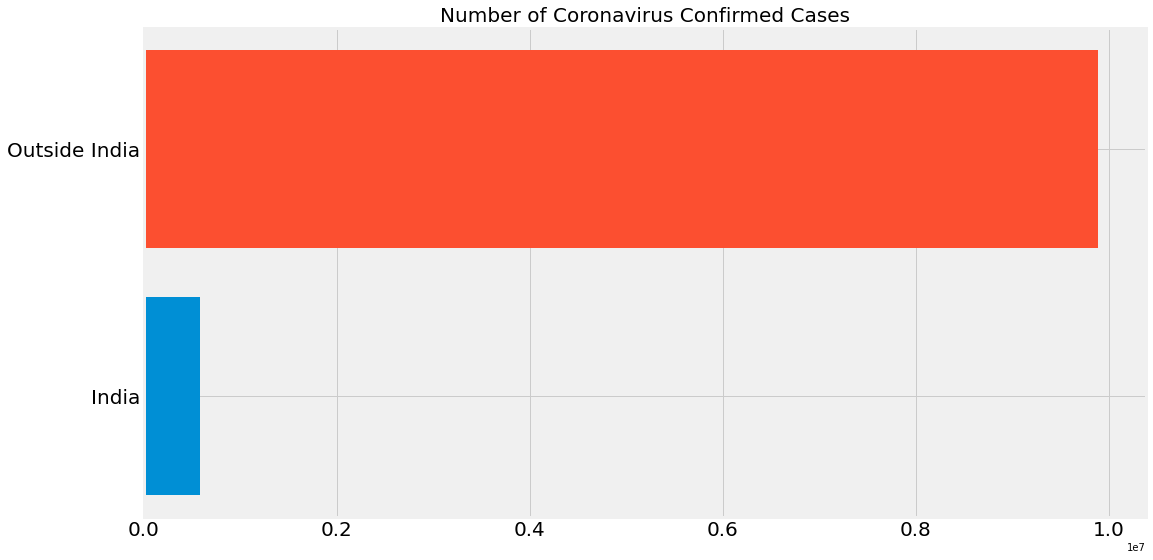

In [41]:
India_confirmed = latest_data[latest_data['Country_Region']=='India']['Confirmed'].sum()
outside_India_confirmed = np.sum(country_confirmed_cases) -India_confirmed
plt.figure(figsize=(16, 9))
plt.barh('India', India_confirmed)
plt.barh('Outside India', outside_India_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [42]:
latest_data[latest_data['Country_Region']=='India']

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
3126,NaN,NaN,Andaman and Nicobar Islands,India,2020-07-01 04:33:52,11.225999,92.968178,97,0,50,47,"Andaman and Nicobar Islands, India",23.259383,0.000000
3127,NaN,NaN,Andhra Pradesh,India,2020-07-01 04:33:52,15.912900,79.740000,14595,187,6511,7897,"Andhra Pradesh, India",27.076218,1.281261
3141,NaN,NaN,Arunachal Pradesh,India,2020-07-01 04:33:52,27.768456,96.384277,191,1,62,128,"Arunachal Pradesh, India",12.162057,0.523560
3142,NaN,NaN,Assam,India,2020-07-01 04:33:52,26.357149,92.830441,8227,12,5647,2568,"Assam, India",23.104982,0.145861
3164,NaN,NaN,Bihar,India,2020-07-01 04:33:52,25.679658,85.604840,10043,67,7687,2289,"Bihar, India",8.047280,0.667131
3196,NaN,NaN,Chandigarh,India,2020-07-01 04:33:52,30.733839,76.768278,440,6,364,70,"Chandigarh, India",37.981032,1.363636
3203,NaN,NaN,Chhattisgarh,India,2020-07-01 04:33:52,21.264705,82.035366,2860,13,2250,597,"Chhattisgarh, India",9.715918,0.454545
3220,NaN,NaN,Dadra and Nagar Haveli and Daman and Diu,India,2020-07-01 04:33:52,20.194742,73.080901,213,0,82,131,"Dadra and Nagar Haveli and Daman and Diu, India",34.593422,0.000000
3223,NaN,NaN,Delhi,India,2020-07-01 04:33:52,28.646519,77.108980,87360,2742,58348,26270,"Delhi, India",466.893080,3.138736
3250,NaN,NaN,Goa,India,2020-07-01 04:33:52,15.359682,74.057396,1315,3,596,716,"Goa, India",82.899921,0.228137


In [43]:
print('Outside USA {} cases:'.format(outside_USA_confirmed))
print('USA: {} cases'.format(USA_confirmed))
print('Total: {} cases'.format(USA_confirmed+outside_USA_confirmed))

Outside USA 7840421 cases:
USA: 2635417 cases
Total: 10475838 cases


In [44]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [45]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

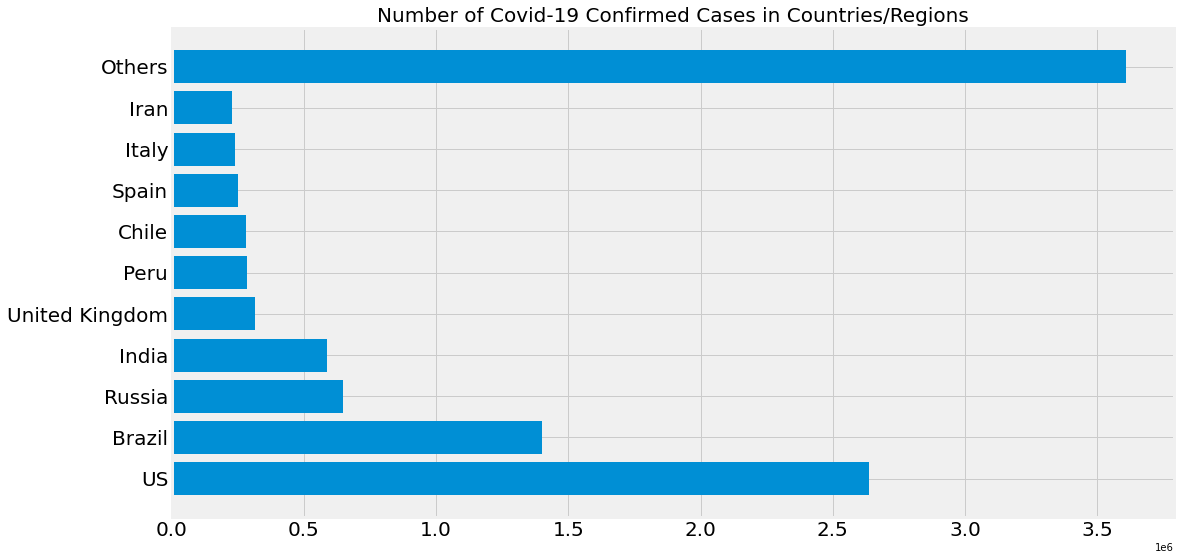

In [46]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Number of Covid-19 Confirmed Cases in Countries/Regions')

In [47]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

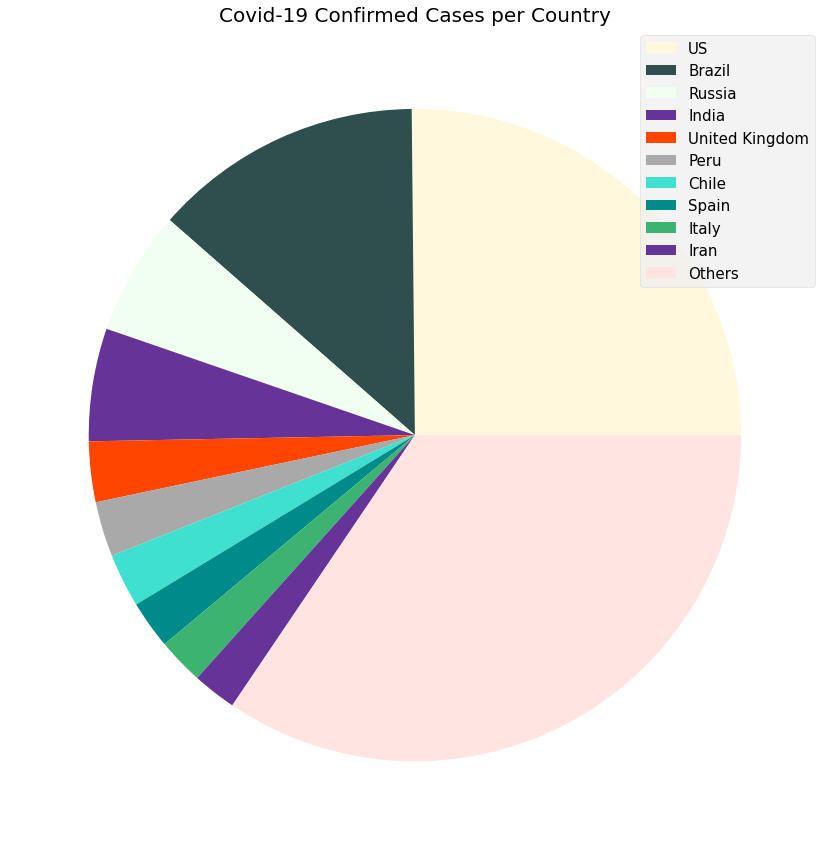

In [48]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

In [49]:
# Only show 10 provinces with the most confirmed cases, the rest are grouped into the others category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

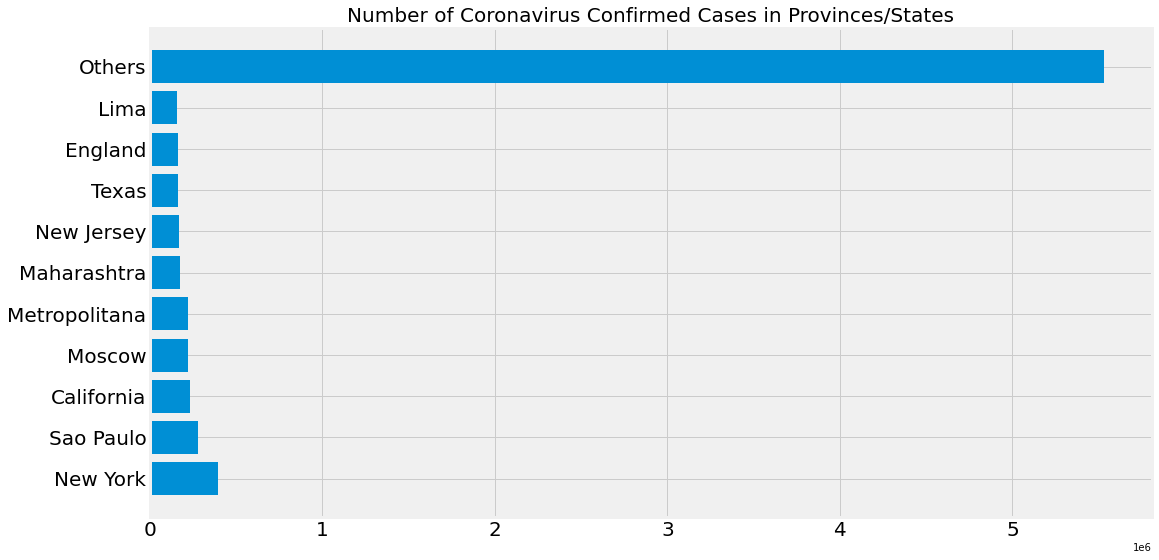

In [50]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'Number of Coronavirus Confirmed Cases in Provinces/States')

In [51]:
def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

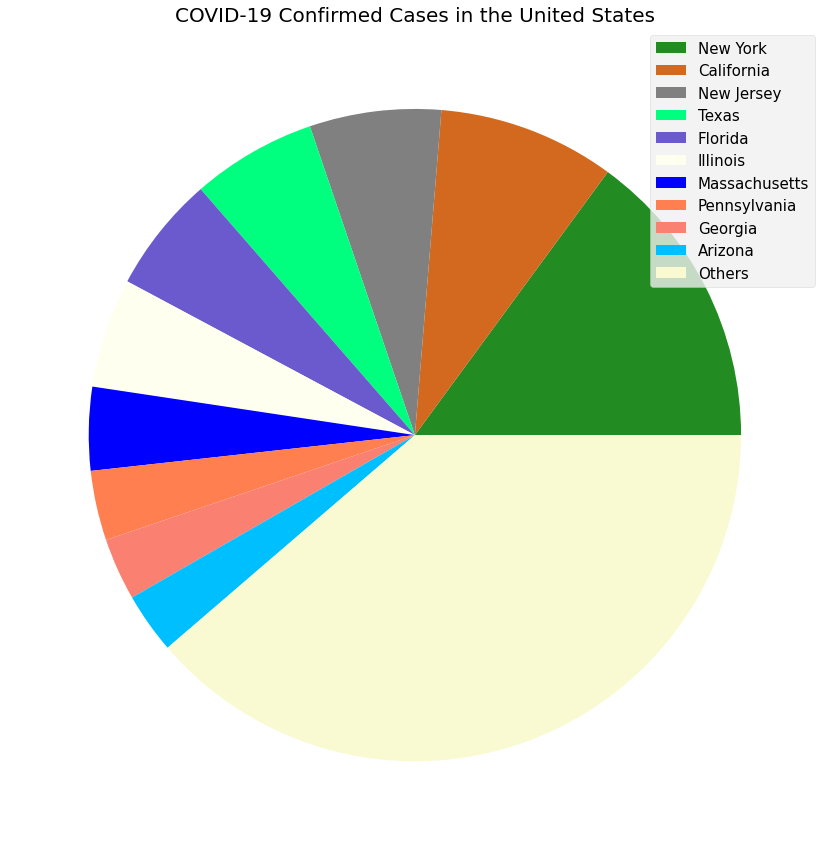

In [52]:
plot_pie_country_with_regions('US', 'COVID-19 Confirmed Cases in the United States')

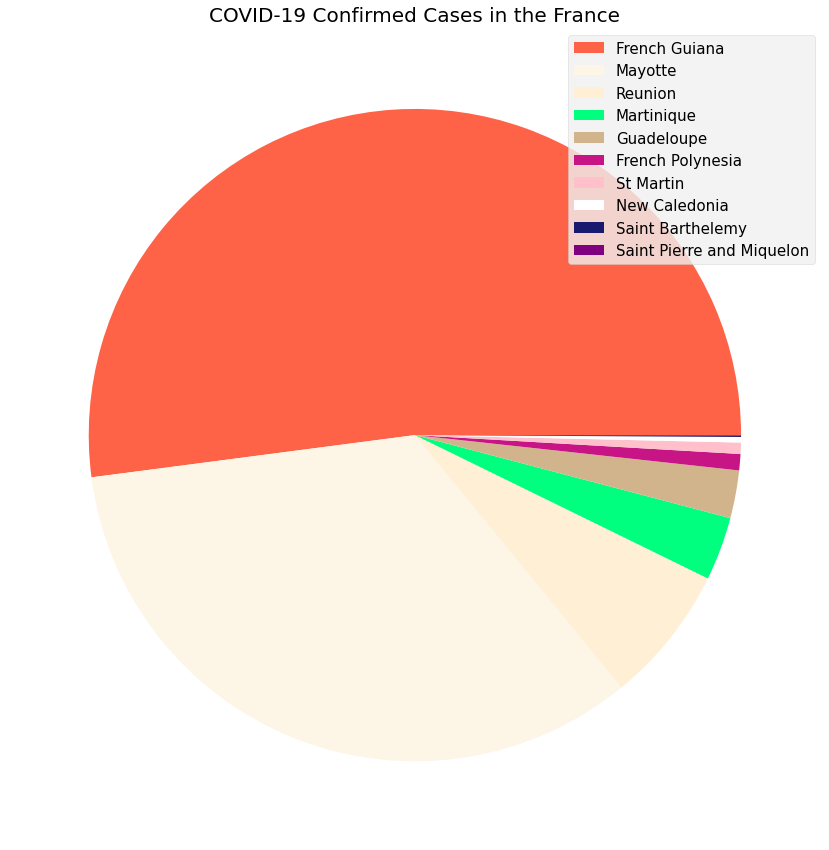

In [53]:
plot_pie_country_with_regions('France', 'COVID-19 Confirmed Cases in the France')

In [54]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [55]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [56]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [57]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [58]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False) 

In [59]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [61]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 619240.0774413053
MSE: 423324544275.7088


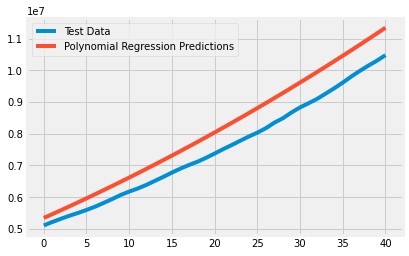

In [62]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [63]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

c:\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 8479178.953676619
MSE: 96289908743789.73


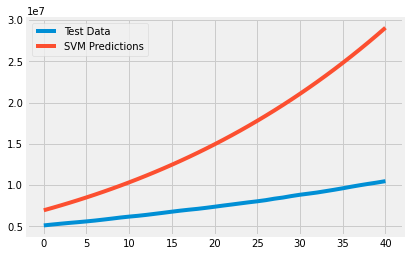

In [64]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

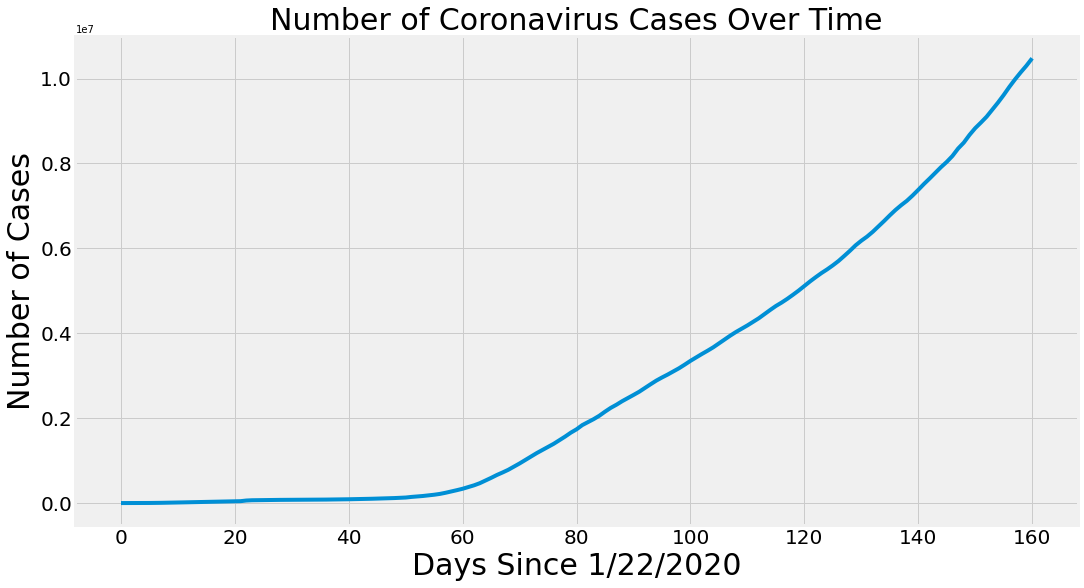

In [65]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

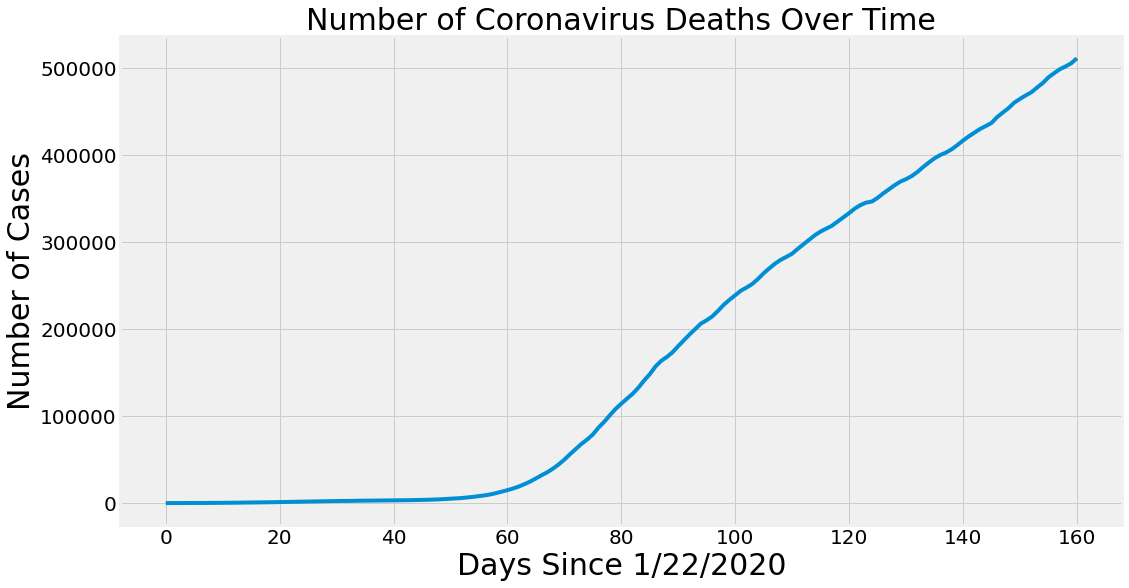

In [66]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

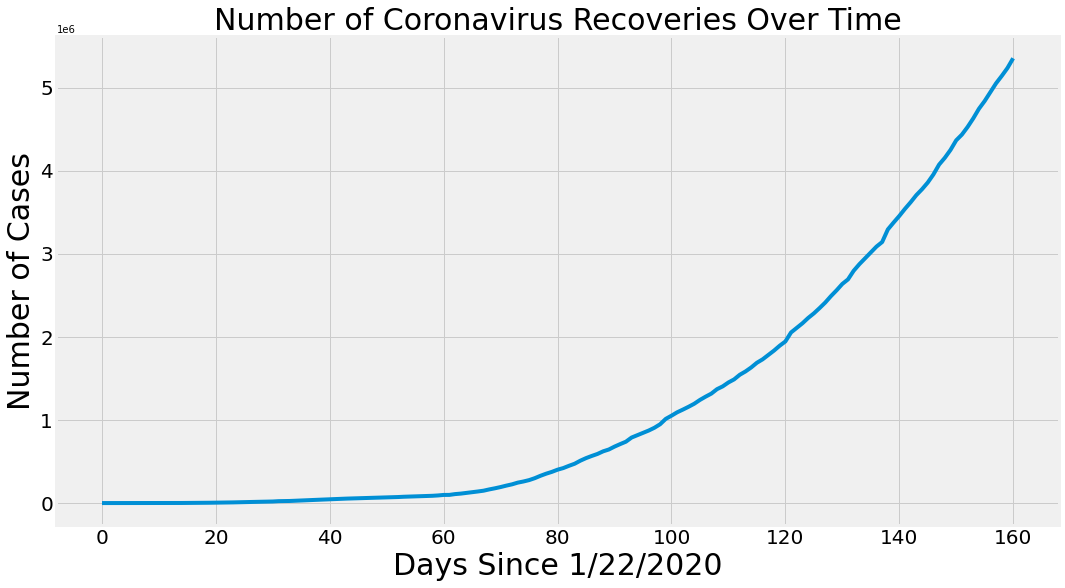

In [67]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

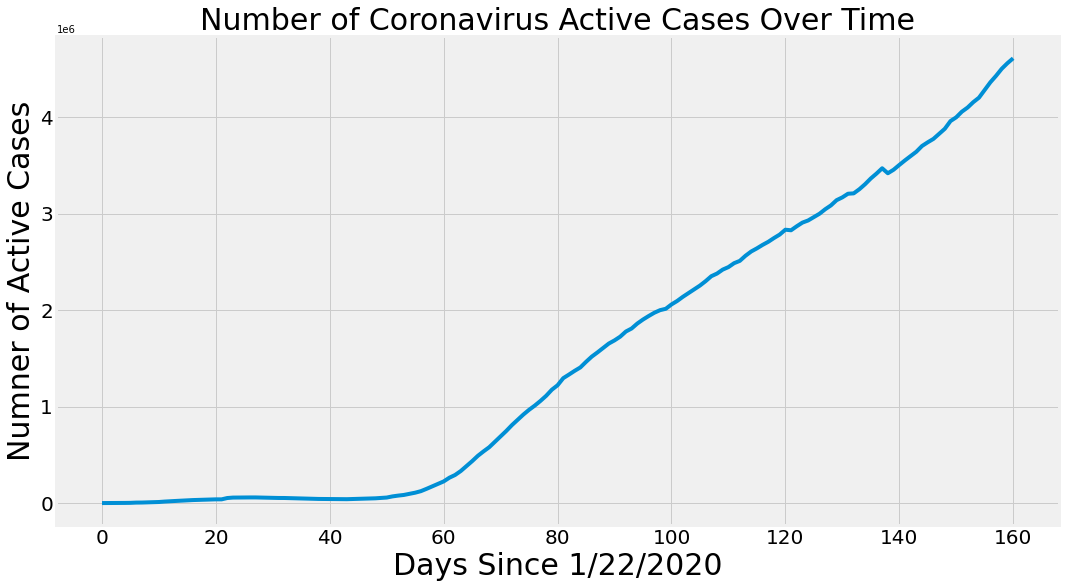

In [68]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('Number of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Numner of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

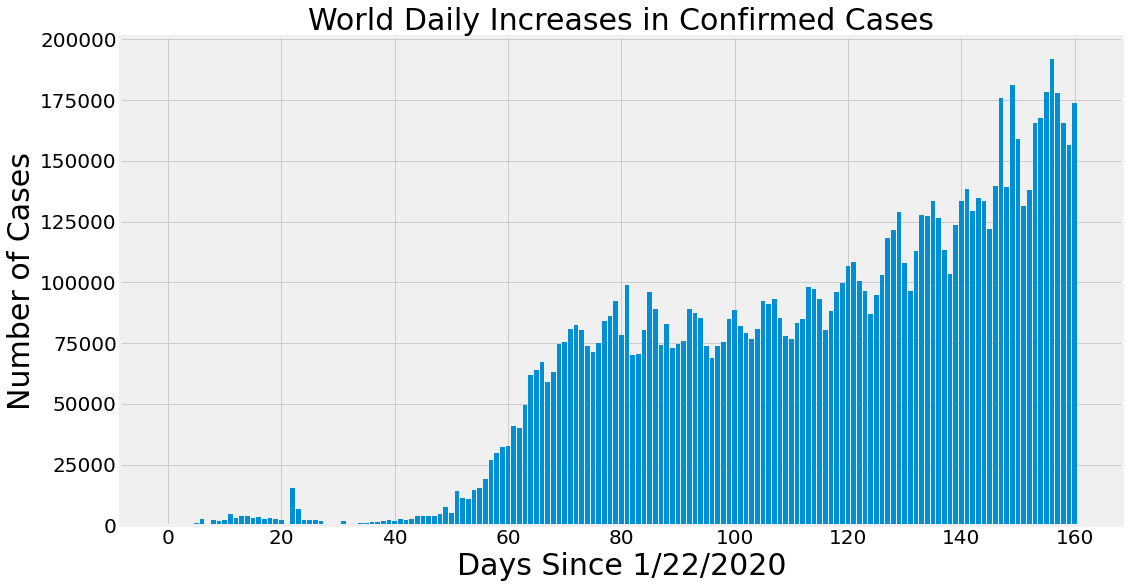

In [69]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

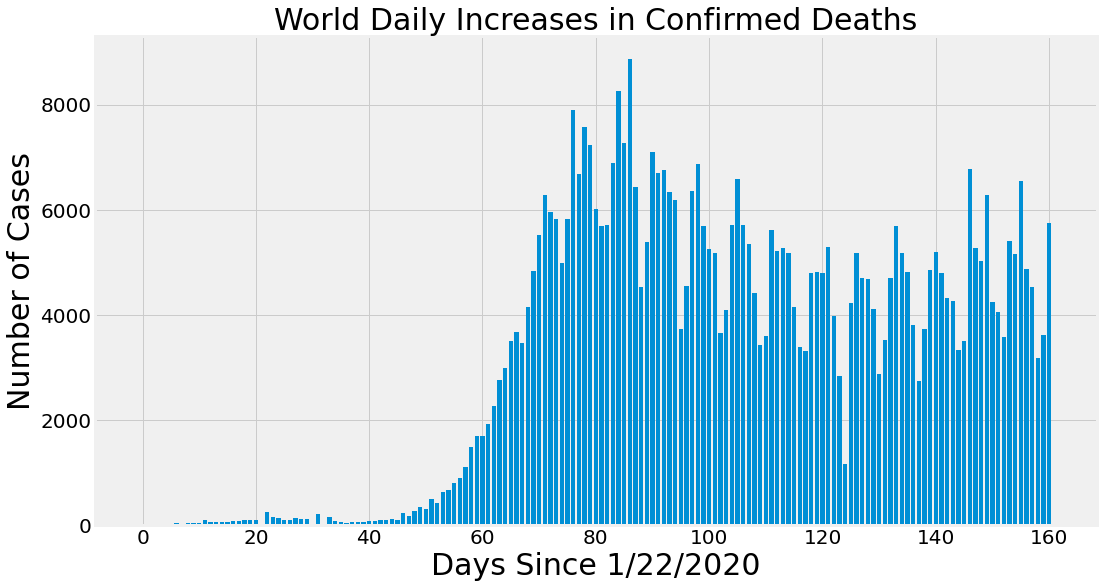

In [70]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

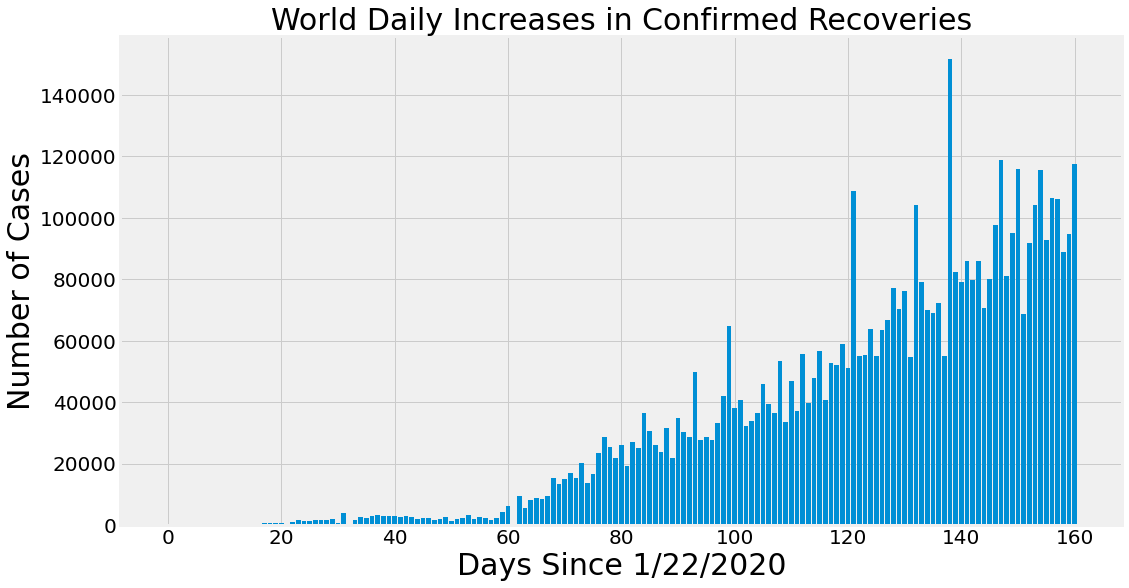

In [71]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [72]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

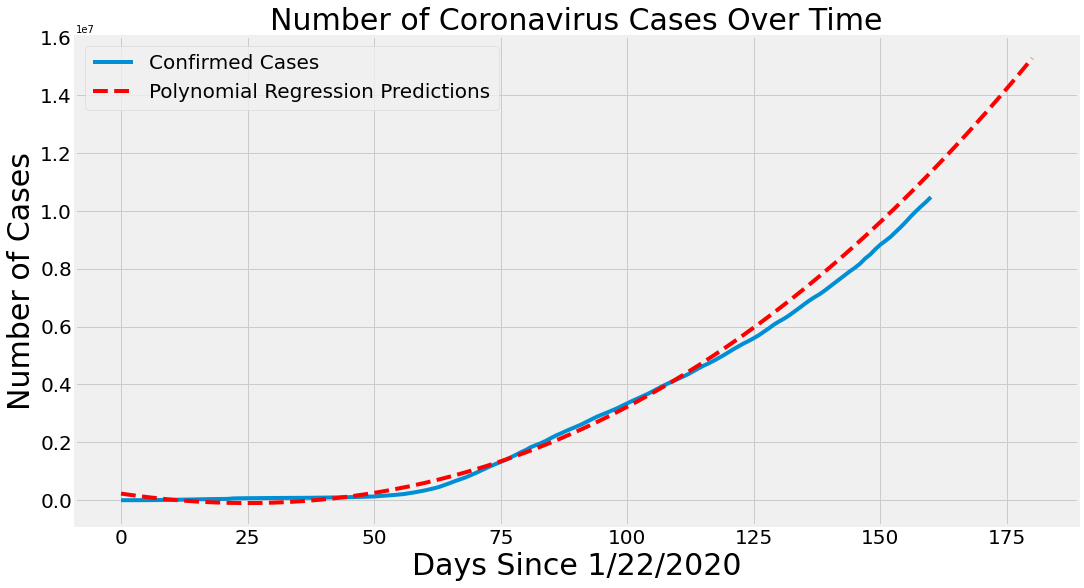

In [73]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'red')

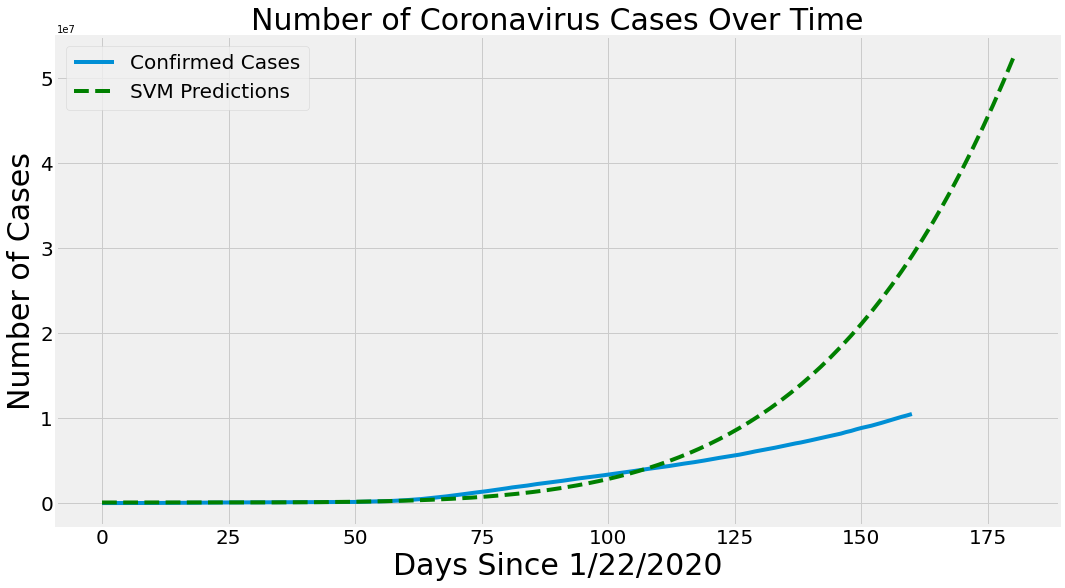

In [74]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'green')

In [75]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases Worldwide': np.round(linear_pred[-20:])})
poly_df

,Date,Predicted number of Confirmed Cases Worldwide
0,07/01/2020,11520848.0
1,07/02/2020,11703784.0
2,07/03/2020,11888314.0
3,07/04/2020,12074441.0
4,07/05/2020,12262168.0
5,07/06/2020,12451501.0
6,07/07/2020,12642441.0
7,07/08/2020,12834994.0
8,07/09/2020,13029162.0
9,07/10/2020,13224950.0


In [76]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-20:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,07/01/2020,29976213.0
1,07/02/2020,30916655.0
2,07/03/2020,31880608.0
3,07/04/2020,32868508.0
4,07/05/2020,33880799.0
5,07/06/2020,34917930.0
6,07/07/2020,35980356.0
7,07/08/2020,37068536.0
8,07/09/2020,38182936.0
9,07/10/2020,39324027.0


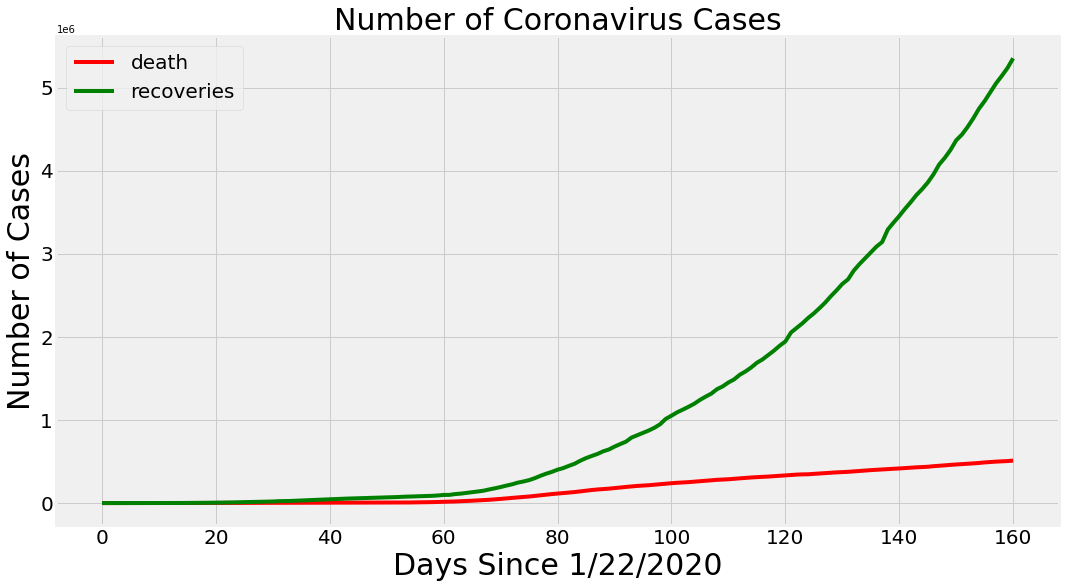

In [77]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

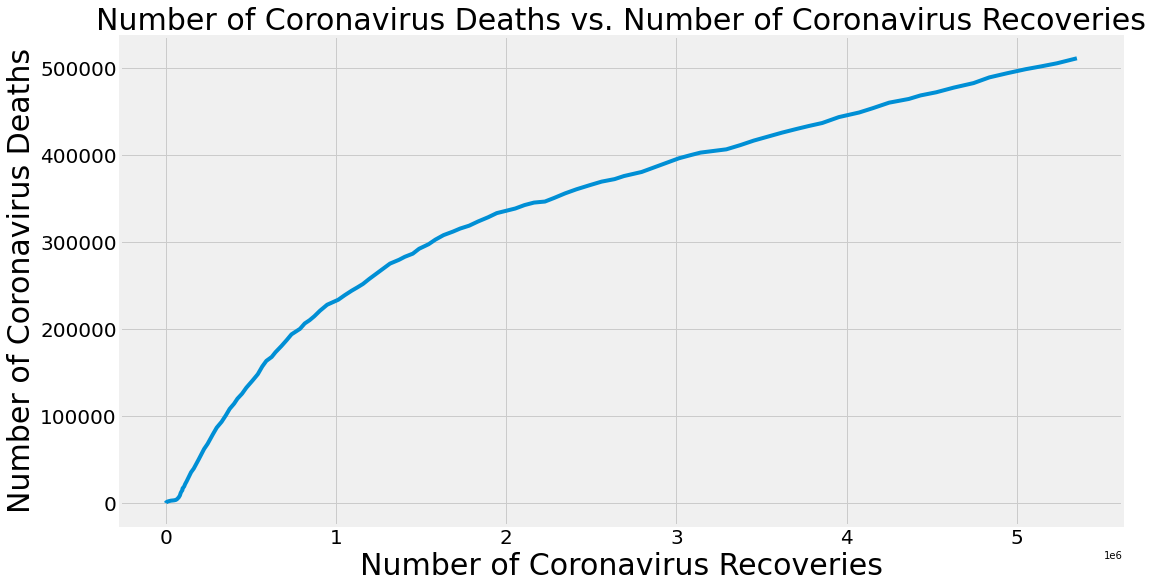

In [78]:
plt.figure(figsize=(16, 9))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [79]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

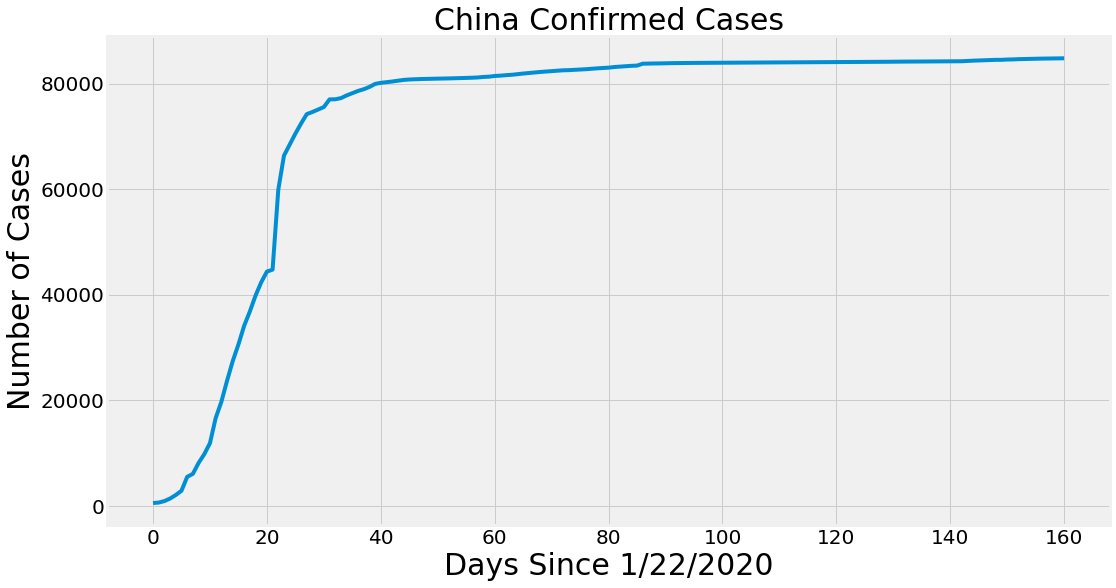

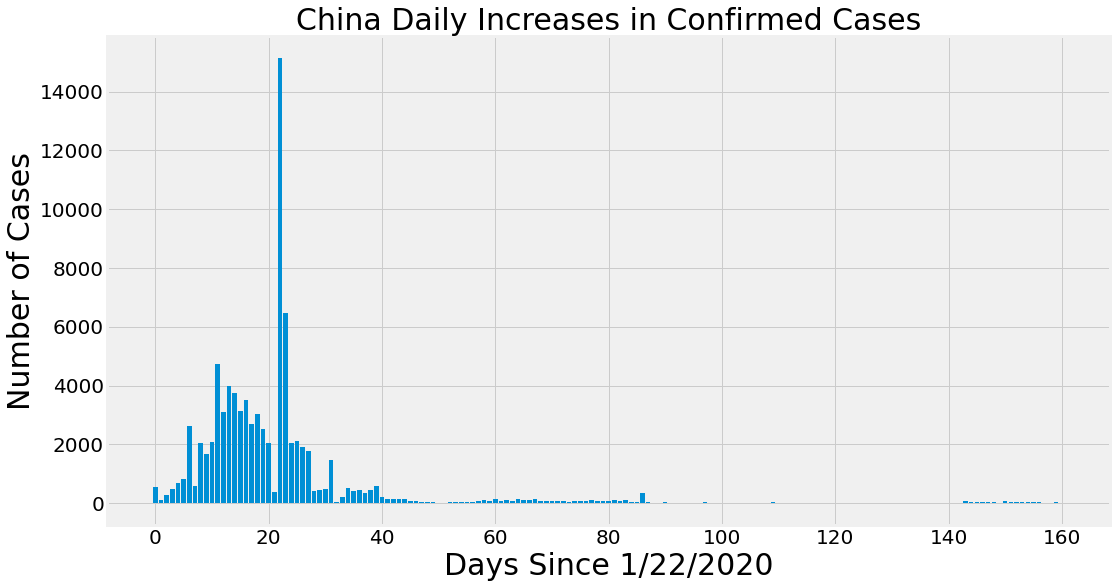

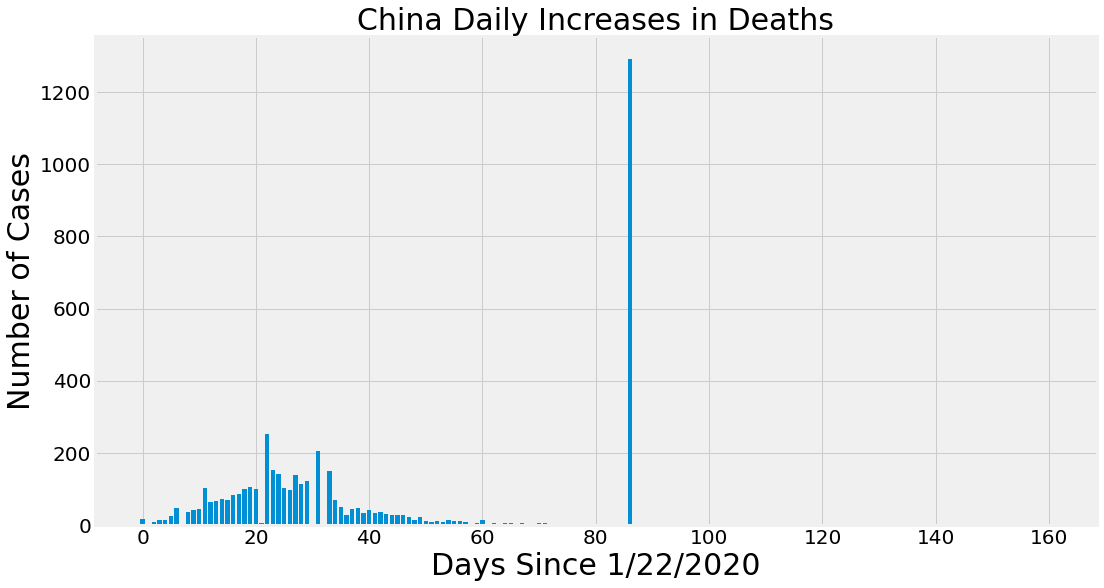

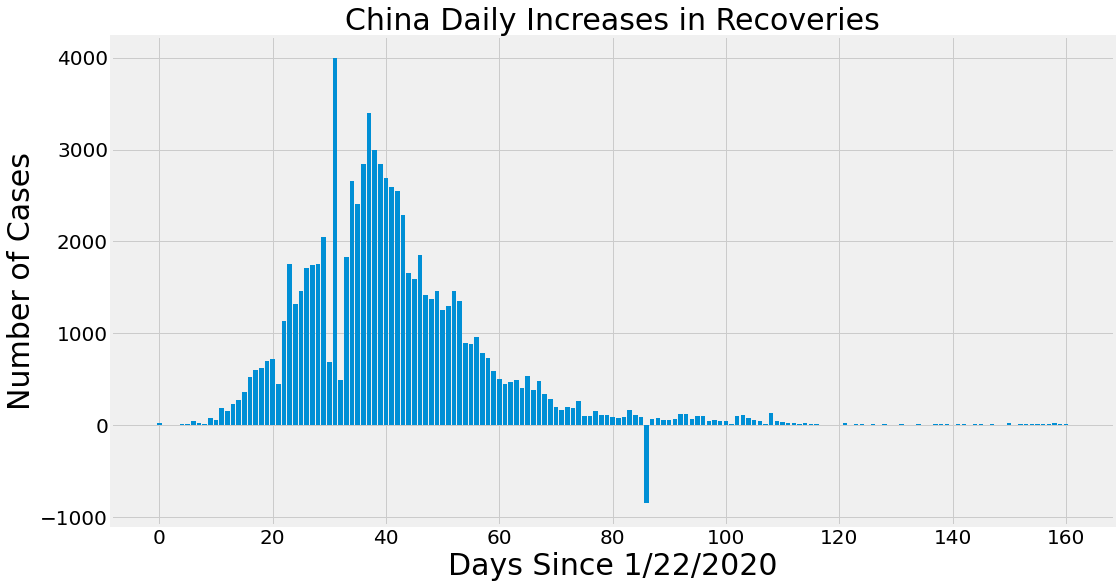

In [80]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

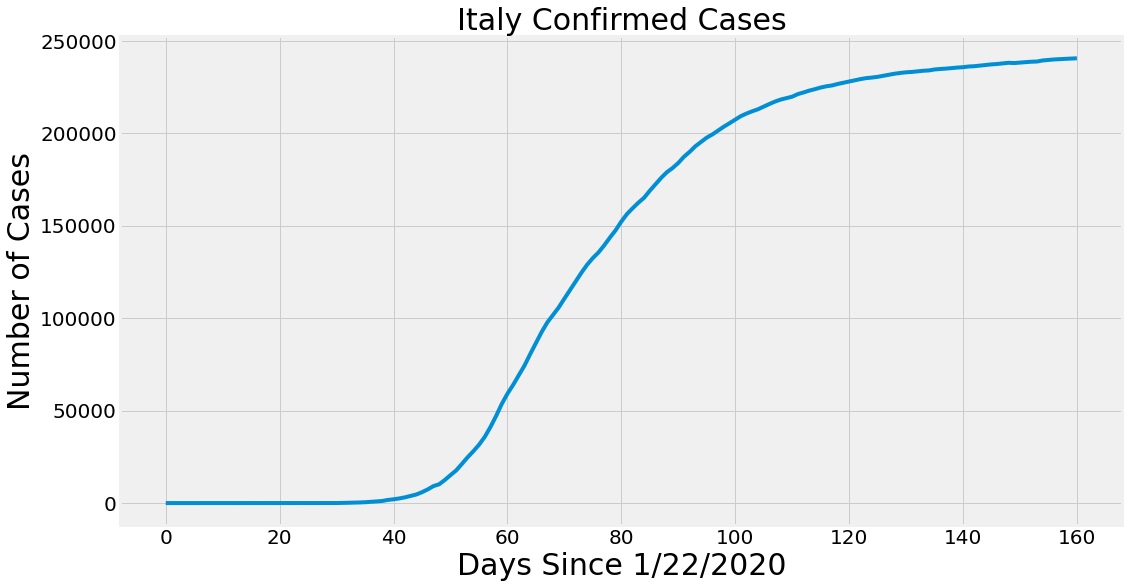

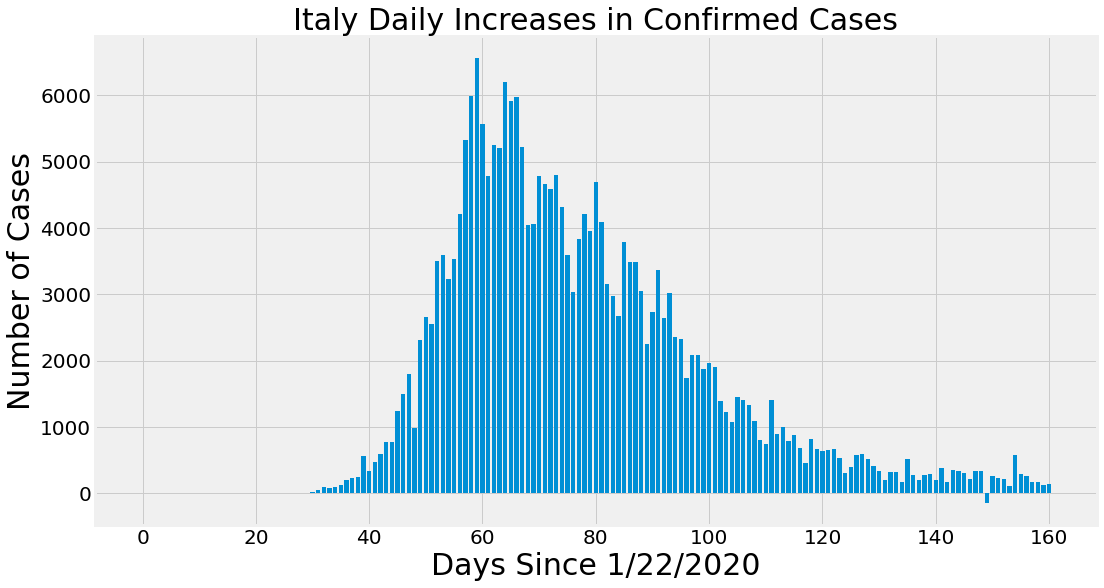

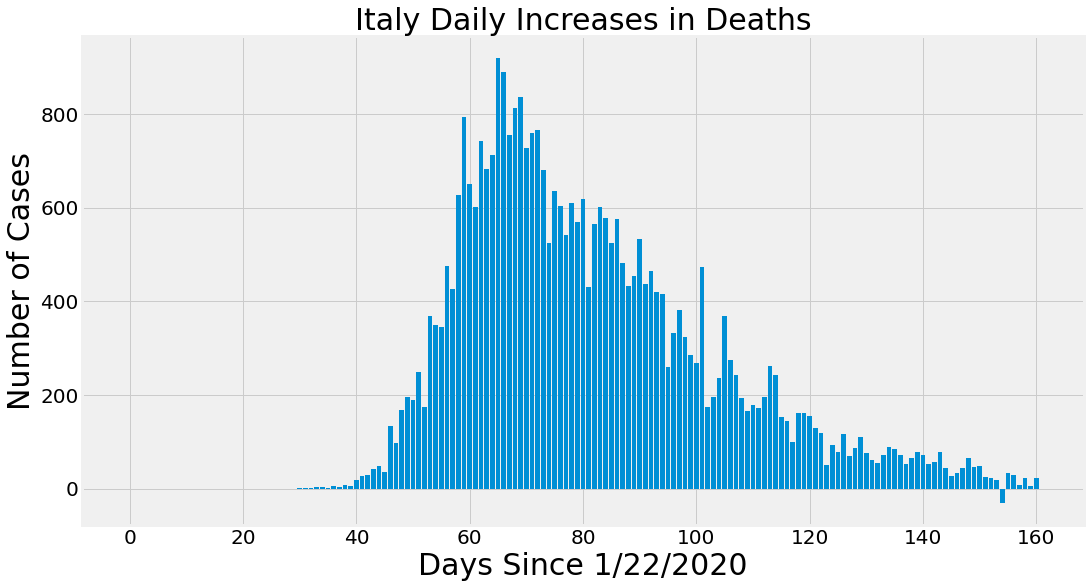

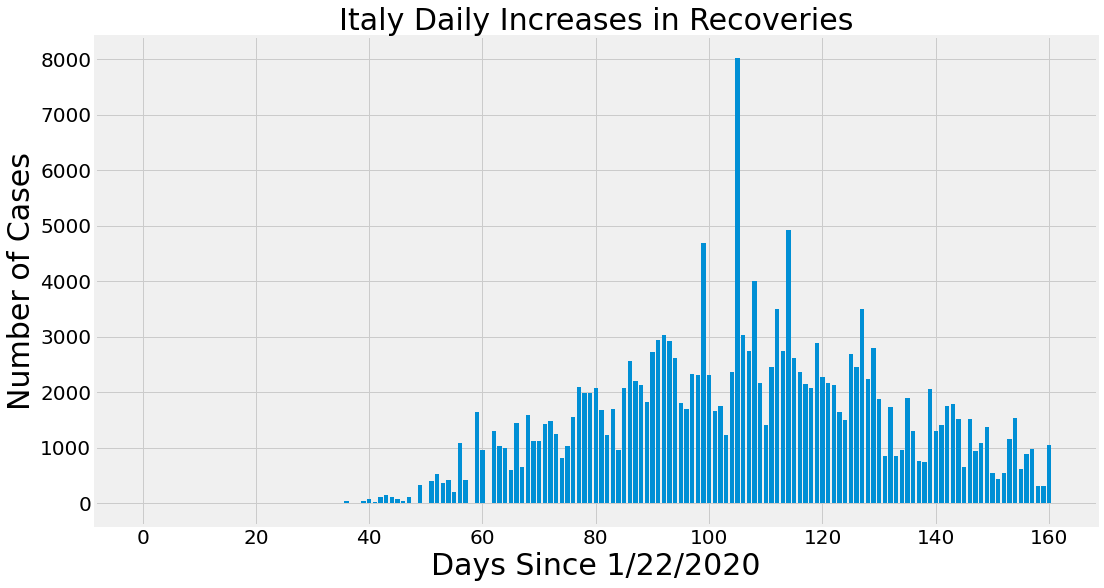

In [81]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

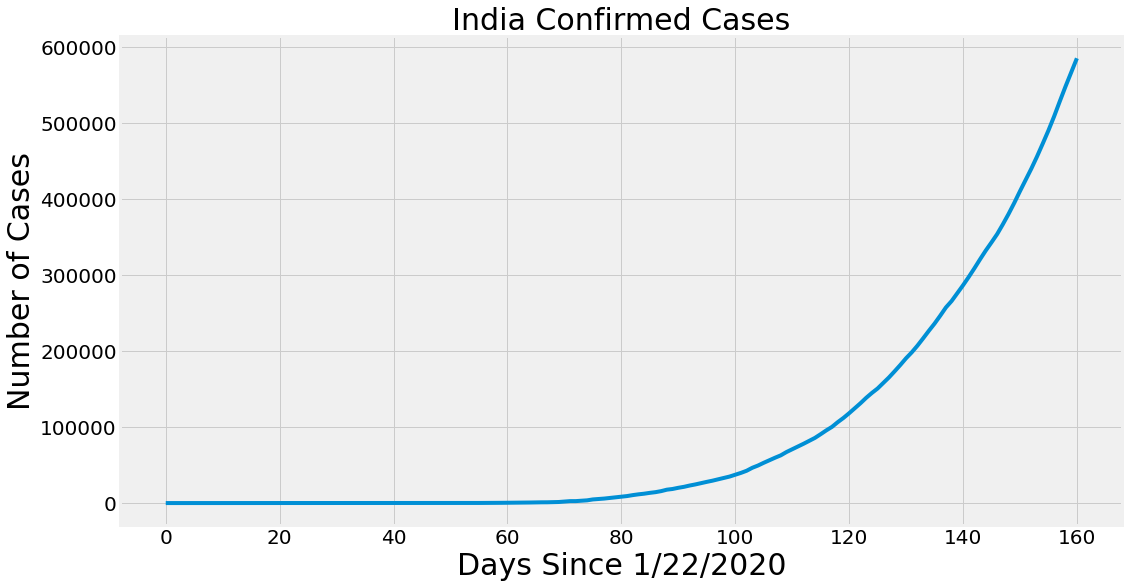

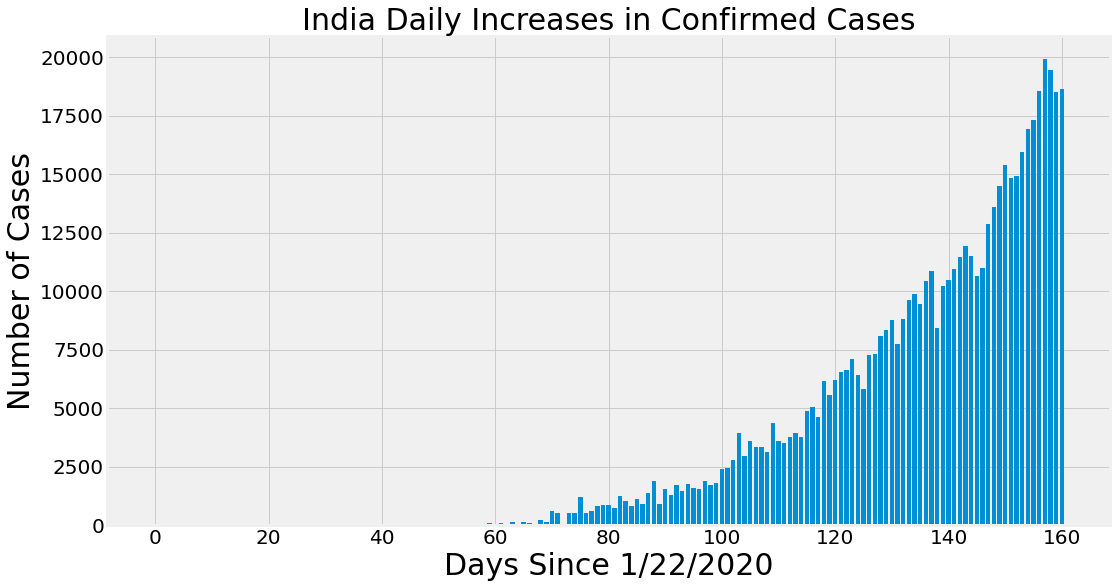

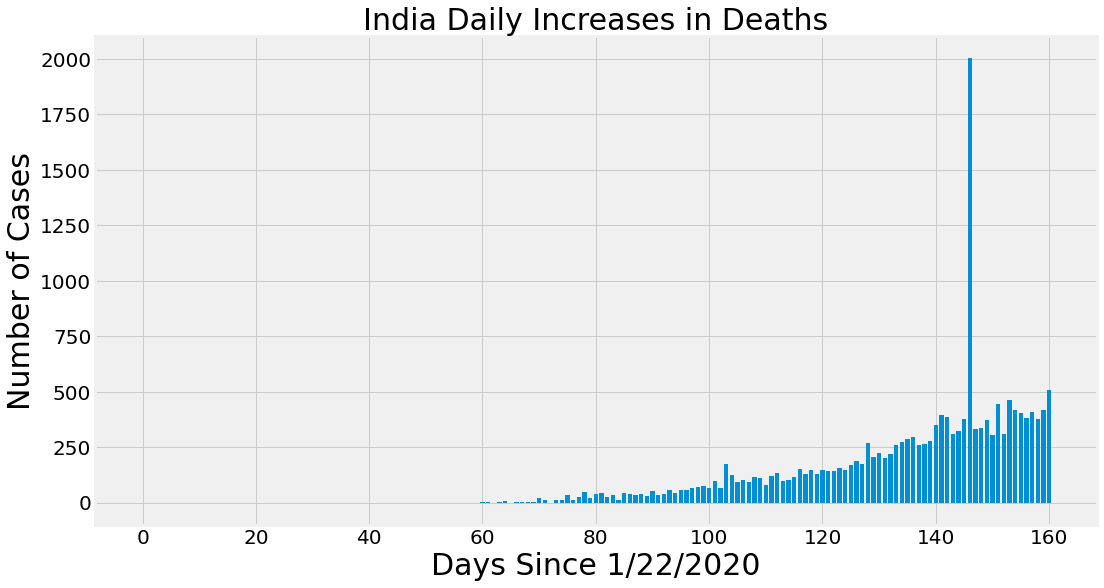

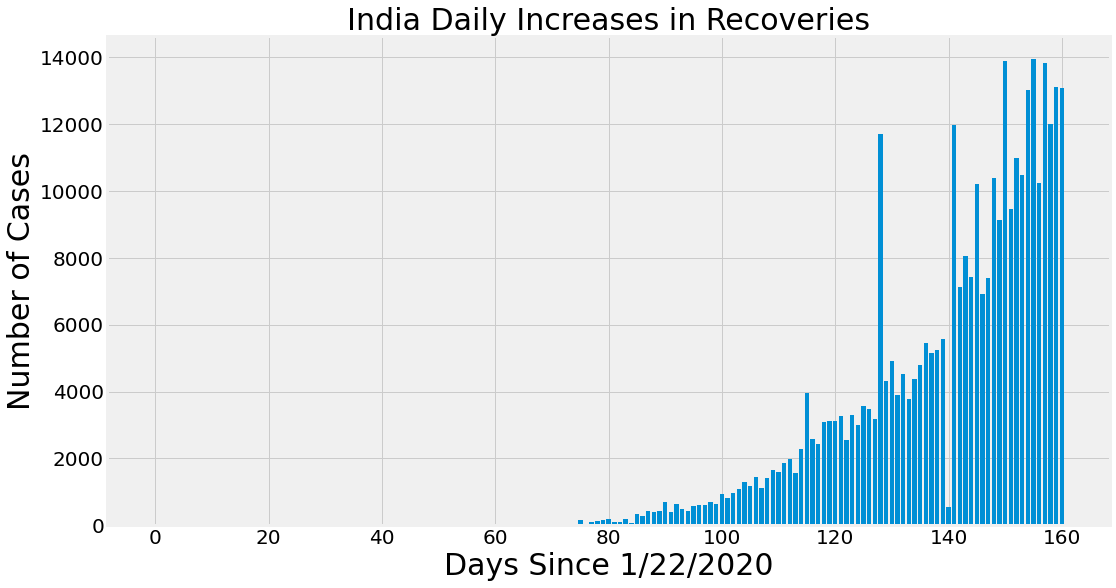

In [82]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

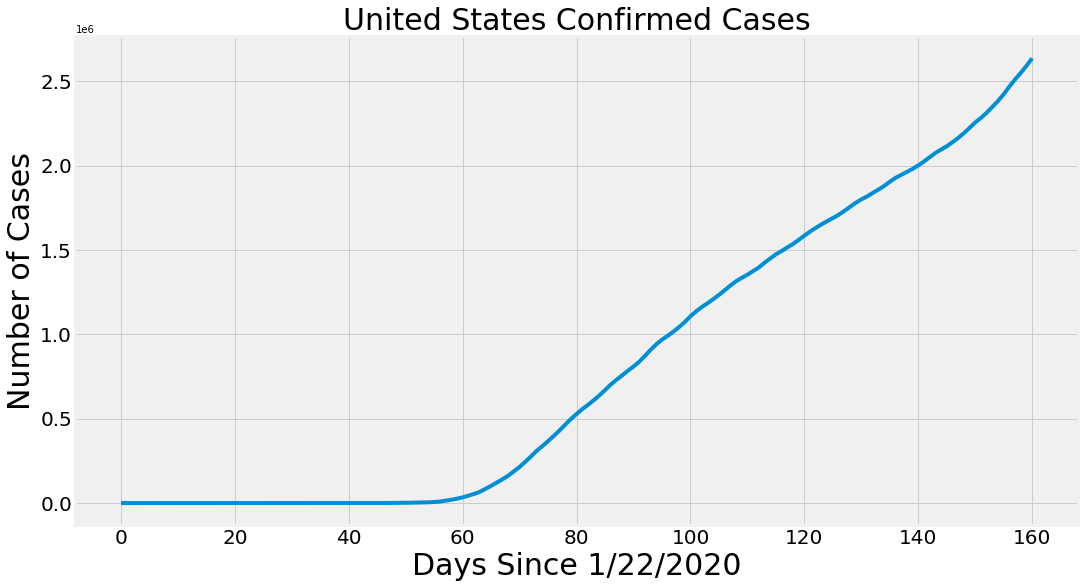

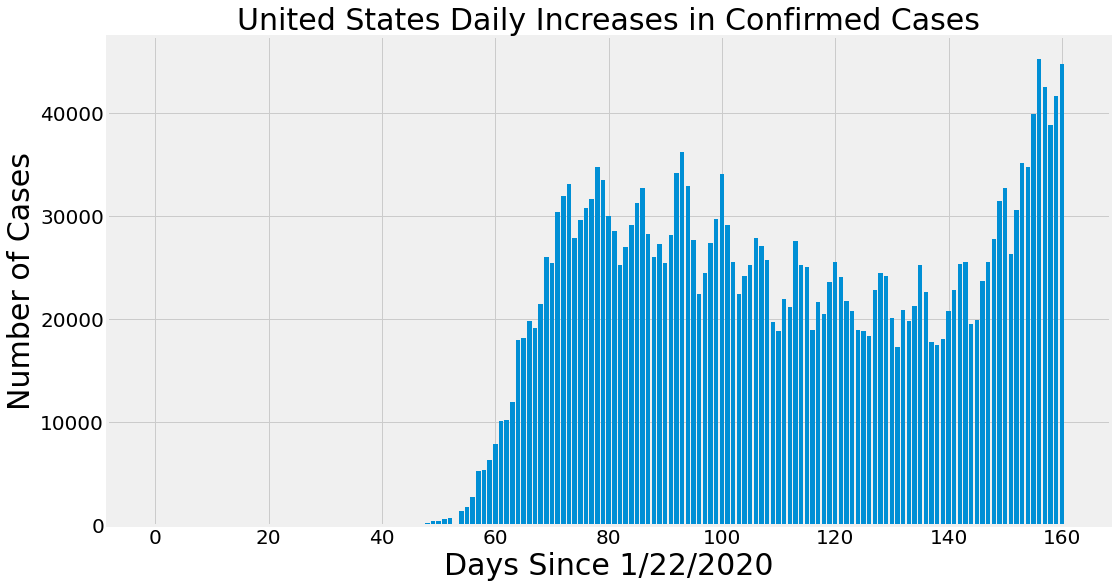

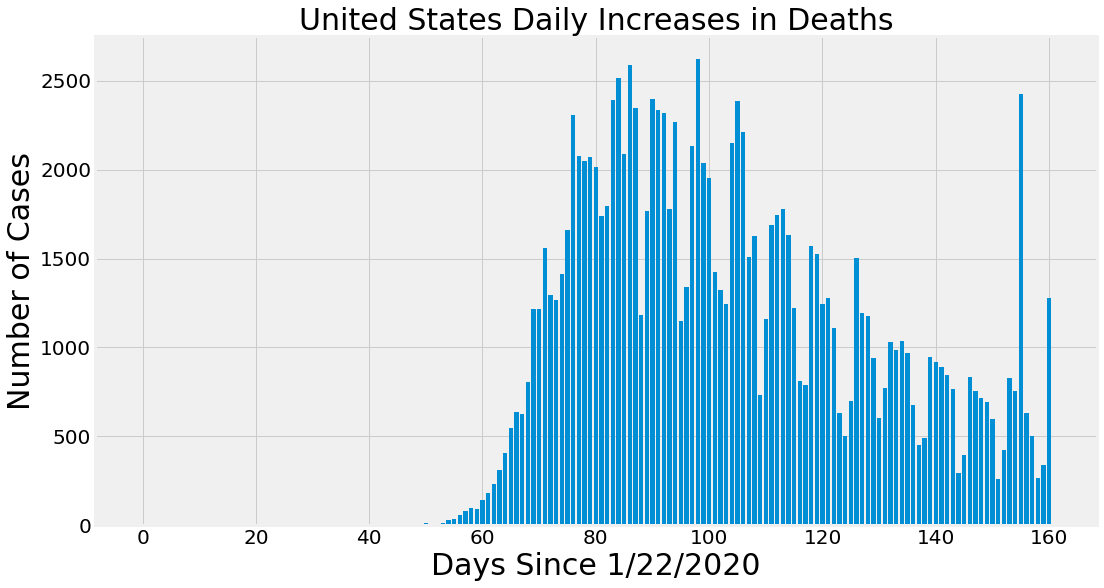

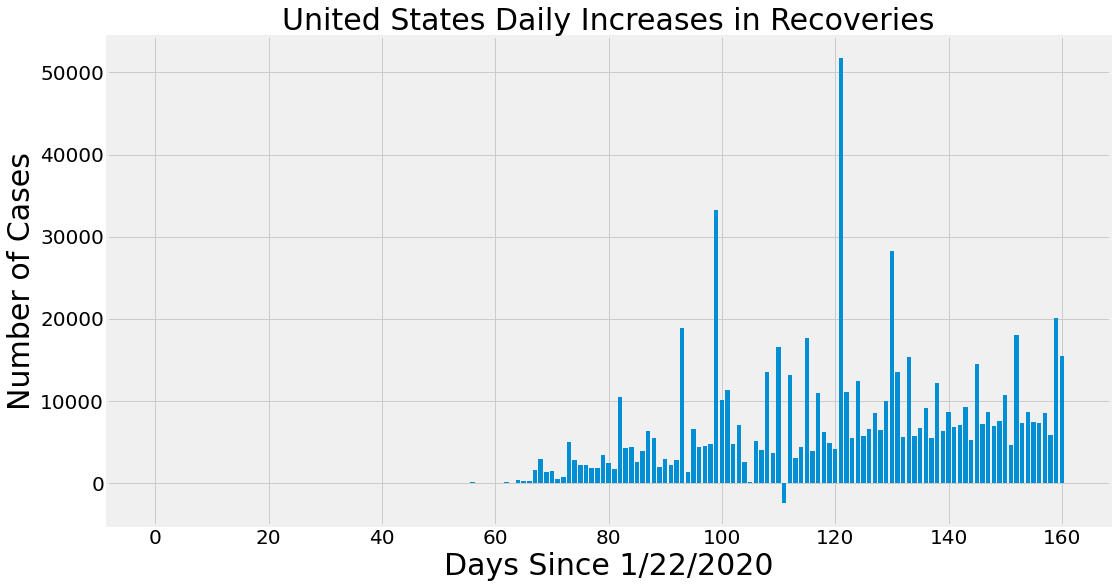

In [83]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'United States')

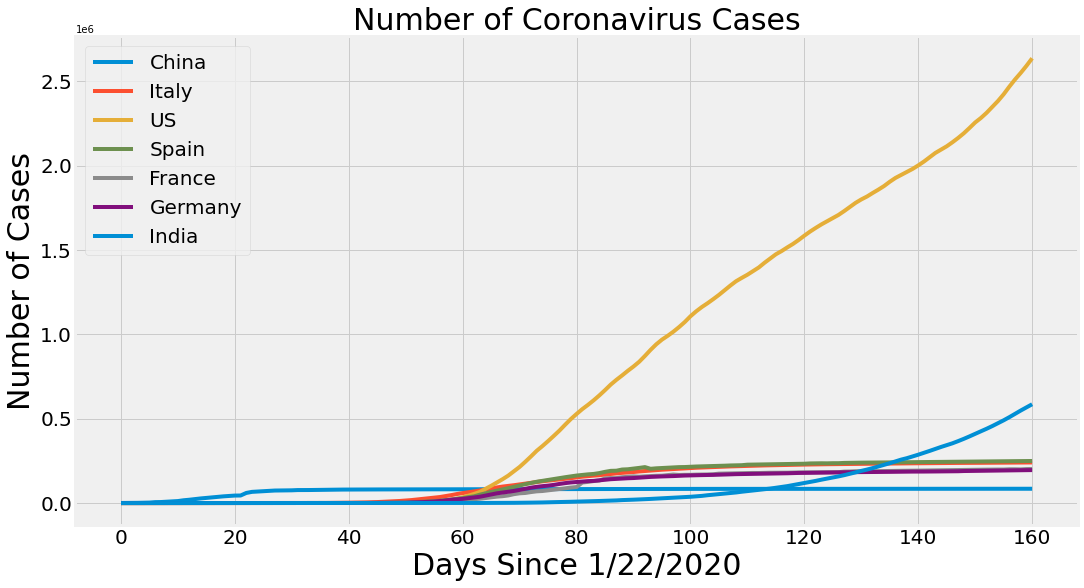

In [84]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

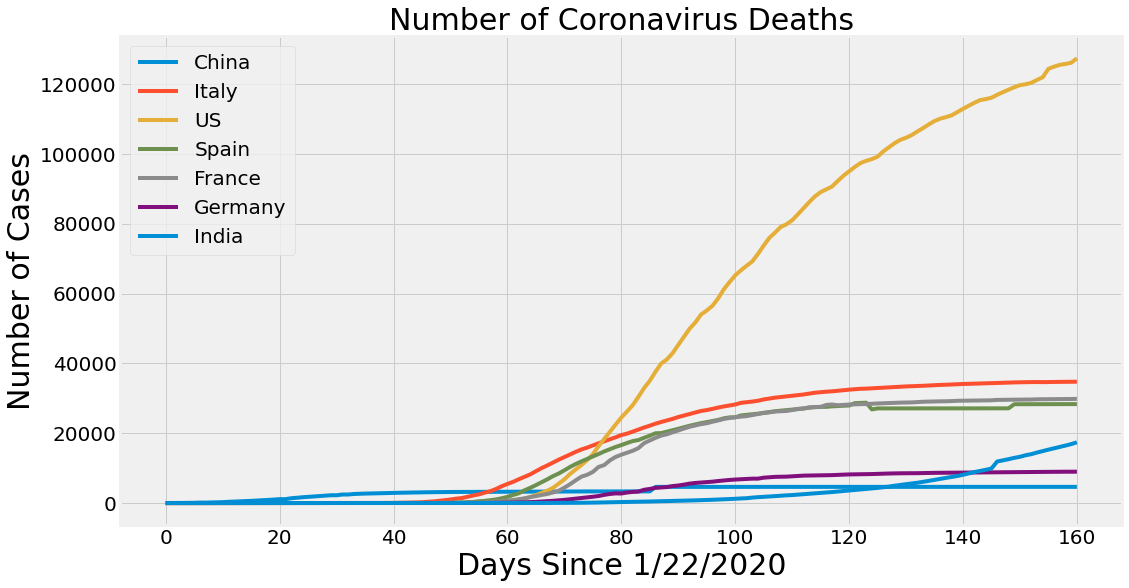

In [85]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)
plt.plot(adjusted_dates, india_deaths)
plt.title('Number of Coronavirus Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

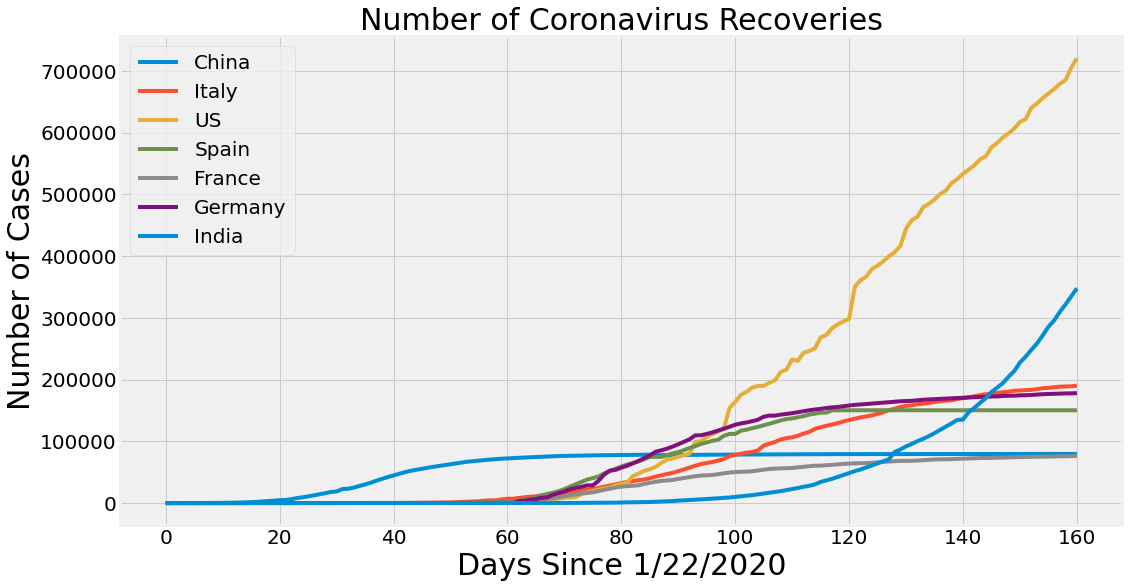

In [86]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.title('Number of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()